# ME460 Linkages - Prof. Mark Ganter
# 3 position path generator via dyad-standard  equations

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

posl2= d1*(-1.59 + 0.809*I)*exp(I*t1) + d2*(-0.00549 - 0.105*I)*exp(I*t2) + 1.4 + 0.76*I
posl3= d1*(-1.31 - 0.951*I)*exp(I*t1) + d2*(-0.201 + 0.602*I)*exp(I*t2) + 1.0 + 2.3*I

left 3pos solution r1,t1,r2,t2 = 1.00077848485381 53.81861986404717 -1.89669979990421 -74.14363943707959
abs(posl2)= 0.00203
abs(posl3)= 0.00187

posr2= d3*(-0.161 + 0.545*I)*exp(I*t3) + d4*(-0.00549 - 0.105*I)*exp(I*t4) + 1.4 + 0.76*I
posr3= d3*(-0.201 + 0.602*I)*exp(I*t3) + d4*(-0.201 + 0.602*I)*exp(I*t4) + 1.0 + 2.3*I

right 3pos solution  r3,t3,r4,t4 = 2.98536370916018 108.37639648410509 -1.99857329101818 5.386569898082617
abs(posr2)= 0.000653
abs(posr3)= 0.00393

phi2 = 126.0 phi3 = 252.0
psi2 = 33.0 psi3 = 252.0
gamma2 = -6.000000000000001 gamma3 = 37.0
del2 = -1.4 - 0.76*I
del3 = -1.0 - 2.3*I

R1 = ( 0.591 + 0.808*I )  ( 1.00 @ 53.81970499916607 degs)
R2 = ( -0.518 + 1.82*I )  ( 1.90 @ 105.86239467301361 degs)
R2 = ( -0.941 + 2.83*I )  ( 2.98 @ 108.38027560864711 degs)
R4 = ( -1.99 - 0.188*I )  ( 2.00 @ -1

<IPython.core.display.Javascript object>


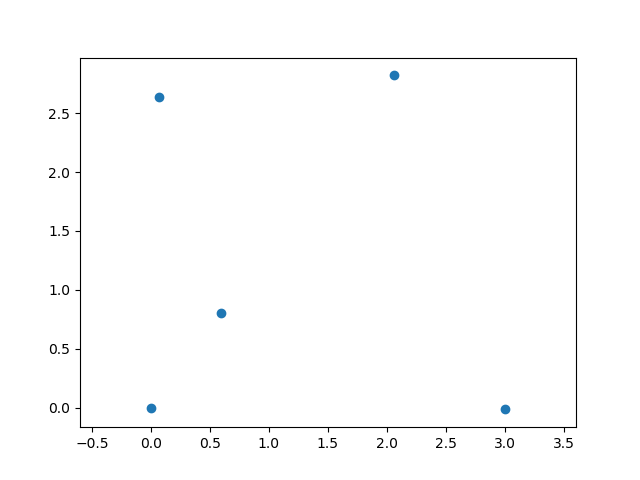

In [1]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# set up deltas
del2 = -1.4-0.76*I
del3 = -1.0-2.3*I

p2 = radians(126)
p3 = radians(252)

# free choices gamma's and psi's
g2 = radians(-6)
g3 = radians(37)

s2 = radians(33)
s3 = radians(37)

# LEFT SIDE #

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d2, t2), (5,radians(10),2 ,radians(-50)), 
            maxsteps=100, tol=0.01, verify=true)

print("left 3pos solution r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()


# RIGHT SIDE #

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3)-1) - del3

print("posr2=",N(posr2,3))
print("posr3=",N(posr3,3))
print()

ans = nsolve((re(posr2),im(posr2),re(posr3),im(posr3)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
            maxsteps=100, tol=0.01, verify=true)

print("right 3pos solution  r3,t3,r4,t4 =",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(posr2)=",N(abs(posr2.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ans[0],t3:ans[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ans[2],t4:ans[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3))
print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

print("Oa = ( 0 + I*0 )")
print("A = (",evalr1,")")
print("C = (",evalr1+evalr2,")")
print("B = (",evalr1+evalr2-evalr4,")")
print("Ob = (",evalr1+evalr2-evalr4-evalr3,")")

# call matplotlib routines for a scatter plot    
plt.scatter([0,re(evalr1),re(evalr1+evalr2),re(evalr1+evalr2-evalr4),re(evalr1+evalr2-evalr4-evalr3)], 
            [0,im(evalr1),im(evalr1+evalr2),im(evalr1+evalr2-evalr4),im(evalr1+evalr2-evalr4-evalr3)])
plt.axes().set_aspect('equal', 'datalim')
plt.show()
